In [1]:
import numpy as np
import nimfa
from nimfa.examples import cbcl_images
from PIL import Image, ImageOps
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def plot_basis_vectors(W, ax):
    """
    Plot basis vectors.
    
    :param W: Basis matrix of the fitted factorization model.
    :type W: `numpy.matrix`
    """
    assert len(W.shape) == 2
    
    # Images must be square:
    r_img = int(np.sqrt(W.shape[0]))
    assert r_img ** 2 == W.shape[0]
    
    # Arrange number of basis vectors in a grid:
    c_grid = int(np.floor(np.sqrt(W.shape[1])))
    r_grid = int(np.ceil(W.shape[1] / c_grid))
    
    blank = Image.new("L", (c_grid * (r_img + 1) - 1, r_grid * (r_img + 1) - 1))
    for i in range(r_grid):
        for j in range(c_grid):
            basis = np.array(W[:, c_grid * i + j]).reshape((r_img, r_img))
            basis = basis / np.max(basis) * 255
            basis = 255 - basis
            ima = Image.fromarray(basis)
            ImageOps.expand(ima, border=1, fill='black')
            blank.paste(ima.copy(), (j * r_img + j, i * r_img + i))
    ax.imshow(blank, cmap='gray')

In [3]:
V = cbcl_images.preprocess(cbcl_images.read())
W, H = cbcl_images.factorize(V)

Reading CBCL faces database
Data preprocessing
Algorithm: lsnmf
Initialization: random_vcol
Rank: 49
Stats:
            - iterations: 50
            - final projected gradients norm: 2.392
            - Euclidean distance: 364.429 
            - Sparseness basis: 0.710, mixture: 0.464


(7, 7)


TypeError: 'int' object is not subscriptable

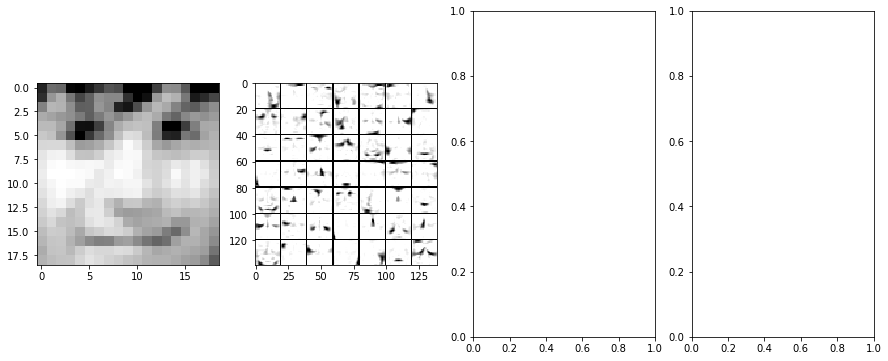

In [7]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

idx = 1000
axes[0].imshow(V[:, idx].reshape((19, 19)), cmap='gray')

plot_basis_vectors(W, axes[1])

imggg = H[:, idx].reshape((7, 7))
axes[2].imshow(ImageOps.expand(imggg, border=1, fill='black'), cmap='gray_r')

axes[3].imshow(np.matmul(W, H[:, idx]).reshape((19, 19)), cmap='gray')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()
fig.savefig('fig4-nmf.eps')